In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [1]:
log_file = './analysis_log.txt'

metrics_dict = {
    'loss' : [],
    'rpn_class_loss' : [],
    'rpn_bbox_loss' : [],
    'mrcnn_class_loss' : [],
    'mrcnn_bbox_loss' : [],
    'mrcnn_mask_loss' : []
}

count = 0

with open(log_file, 'r') as file:
    for line in file:
        #print(line)
        fields = line.split(' ')
        try:
            if(fields[9] == 'loss:'): continue
            else:
                try:
                    metrics_dict['loss'].append(float(fields[9]))
                    metrics_dict['rpn_class_loss'].append(float(fields[12]))
                    metrics_dict['rpn_bbox_loss'].append(float(fields[15]))
                    metrics_dict['mrcnn_class_loss'].append(float(fields[18]))
                    metrics_dict['mrcnn_bbox_loss'].append(float(fields[21]))
                    metrics_dict['mrcnn_mask_loss'].append(float(fields[24]))
                except:
                    continue
        except:
            continue
        
        if(count == 100):
            break;
        else:
            count += count
        
                    
                

In [10]:
log_file = './stuff_train_log.txt'

metrics_dict = {
    'loss' : [],
    'rpn_class_loss' : [],
    'rpn_bbox_loss' : [],
    'mrcnn_class_loss' : [],
    'mrcnn_bbox_loss' : [],
    'mrcnn_mask_loss' : []
}

val_metrics_dict = {
    'loss' : [],
    'rpn_class_loss' : [],
    'rpn_bbox_loss' : [],
    'mrcnn_class_loss' : [],
    'mrcnn_bbox_loss' : [],
    'mrcnn_mask_loss' : [],
    'val_loss' : [],
    'val_rpn_class_loss' : [],
    'val_rpn_bbox_loss' : [],
    'val_mrcnn_class_loss' : [],
    'val_mrcnn_bbox_loss' : [],
    'val_mrcnn_mask_loss' : []
}

with open(log_file, 'r') as file:
    for line in file:
        #loss: 3.8000
        matches = re.findall('(\d+\.\d+)', line)
        
        if(len(matches) == 6):
            metrics_dict['loss'].append(float(matches[0]))
            metrics_dict['rpn_class_loss'].append(float(matches[1]))
            metrics_dict['rpn_bbox_loss'].append(float(matches[2]))
            metrics_dict['mrcnn_class_loss'].append(float(matches[3]))
            metrics_dict['mrcnn_bbox_loss'].append(float(matches[4]))
            metrics_dict['mrcnn_mask_loss'].append(float(matches[5]))
        elif(len(matches) == 12):
            val_metrics_dict['loss'].append(float(matches[0]))
            val_metrics_dict['rpn_class_loss'].append(float(matches[1]))
            val_metrics_dict['rpn_bbox_loss'].append(float(matches[2]))
            val_metrics_dict['mrcnn_class_loss'].append(float(matches[3]))
            val_metrics_dict['mrcnn_bbox_loss'].append(float(matches[4]))
            val_metrics_dict['mrcnn_mask_loss'].append(float(matches[5]))
            val_metrics_dict['val_loss'].append(float(matches[6]))
            val_metrics_dict['val_rpn_class_loss'].append(float(matches[7]))
            val_metrics_dict['val_rpn_bbox_loss'].append(float(matches[8]))
            val_metrics_dict['val_mrcnn_class_loss'].append(float(matches[9]))
            val_metrics_dict['val_mrcnn_bbox_loss'].append(float(matches[10]))
            val_metrics_dict['val_mrcnn_mask_loss'].append(float(matches[11]))



In [11]:
r = np.arange(0, len(metrics_dict['mrcnn_mask_loss']))
print(len(r))
print(len(metrics_dict['loss']))


90420
90420


In [12]:
analysis_df = pd.DataFrame(metrics_dict, index=r)
print(analysis_df.head())

     loss  mrcnn_bbox_loss  mrcnn_class_loss  mrcnn_mask_loss  rpn_bbox_loss  \
0  3.8000           0.5728            0.5945           0.6630         0.9998   
1  4.3318           0.6338            0.9076           0.6376         1.1639   
2  4.4398           0.6740            1.0567           0.6521         1.0646   
3  4.3901           0.6688            1.0506           0.6382         1.0453   
4  4.2871           0.6742            0.9830           0.6469         1.0002   

   rpn_class_loss  
0          0.0230  
1          0.0417  
2          0.0452  
3          0.0401  
4          0.0357  


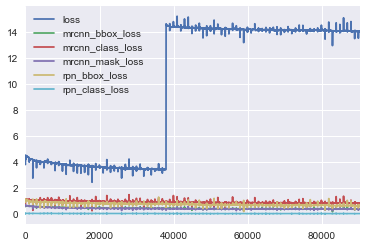

In [13]:
analysis_df.plot()

In [14]:
r = np.arange(0, len(val_metrics_dict['val_loss']))
print(len(r))
print(len(val_metrics_dict['val_loss']))


90
90


In [15]:
val_analysis_df = pd.DataFrame(val_metrics_dict, index=r)
val_analysis_df.head()

,loss,mrcnn_bbox_loss,mrcnn_class_loss,mrcnn_mask_loss,rpn_bbox_loss,rpn_class_loss,val_loss,val_mrcnn_bbox_loss,val_mrcnn_class_loss,val_mrcnn_mask_loss,val_rpn_bbox_loss,val_rpn_class_loss
0,4.3377,0.6157,1.0948,0.6170,1.0232,0.0413,4.9677,0.5687,1.0618,0.5196,1.8220,0.0513
1,4.1893,0.5887,1.0752,0.5869,0.9568,0.0388,5.4229,0.4733,0.9220,0.4937,2.5449,0.0476
2,4.0778,0.5683,1.0437,0.5568,0.9302,0.0386,5.6214,0.5531,1.1741,0.4874,2.4227,0.0453
3,4.0256,0.5611,1.0488,0.5384,0.9028,0.0373,4.4487,0.4776,0.9717,0.4882,1.5199,0.0555
4,3.9936,0.5425,1.0492,0.5228,0.9086,0.0361,4.7774,0.5167,1.1142,0.4017,1.7560,0.0559


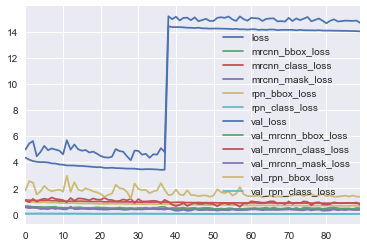

In [16]:
val_analysis_df.plot()

In [19]:
val_analysis_df.mean()

loss                     9.751888
mrcnn_bbox_loss          0.437418
mrcnn_class_loss         0.917059
mrcnn_mask_loss          0.416110
rpn_bbox_loss            0.749942
rpn_class_loss           0.029718
val_loss                10.665997
val_mrcnn_bbox_loss      0.470844
val_mrcnn_class_loss     0.939800
val_mrcnn_mask_loss      0.362213
val_rpn_bbox_loss        1.654849
val_rpn_class_loss       0.037792
dtype: float64

In [21]:
val_analysis_df[41:].min()

loss                    14.0327
mrcnn_bbox_loss          0.3925
mrcnn_class_loss         0.8361
mrcnn_mask_loss          0.3727
rpn_bbox_loss            0.6334
rpn_class_loss           0.0245
val_loss                14.6556
val_mrcnn_bbox_loss      0.3321
val_mrcnn_class_loss     0.5674
val_mrcnn_mask_loss      0.2648
val_rpn_bbox_loss        1.3109
val_rpn_class_loss       0.0249
dtype: float64